# Plan :
- First, we download the dataset.
- Next, we do some preliminary analysis of the data.

- After that, we set up a validation strategy to make sure our model    produces correct predictions.
- Then we implement a linear regression model in Python and NumPy.
- Next, we cover feature engineering to extract important features from the data to improve the model.
- Finally, we see how to make our model stable with regularization and use it to predict car prices

# Importing The dataset

In [1]:
import zipfile

# Path to the zip file
zip_file_path = "C:/Users/hp/Desktop/Ml_Projects/Car_Price/data.csv (1).zip"

# Destination folder where the contents will be extracted
extract_to_folder = "C:/Users/hp/Desktop/Ml_Projects/Car_Price"

# Open the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # Extract all files to the destination folder
    zip_ref.extractall(extract_to_folder)

print("Files successfully unzipped!")


Files successfully unzipped!


# EDA

In [3]:
# importing necessar libraries for EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
# Read the data
df = pd.read_csv('C:/Users/hp/Desktop/Ml_Projects/Car_Price/data.csv')

In [56]:
# lenght of the data
print(len(df))

11914


In [57]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [7]:
# Lower case the column names
df.columns = df.columns.str.lower().str.replace(' ' , '_')

In [8]:
df.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

In [9]:
# getting string columns
string_cols = list(df.dtypes[df.dtypes=='object'].index)
for col in string_cols:
    df[col] = df[col].str.lower().str.replace(' ' , '_')

In [61]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


### Target variable analysis

<Axes: xlabel='msrp', ylabel='Count'>

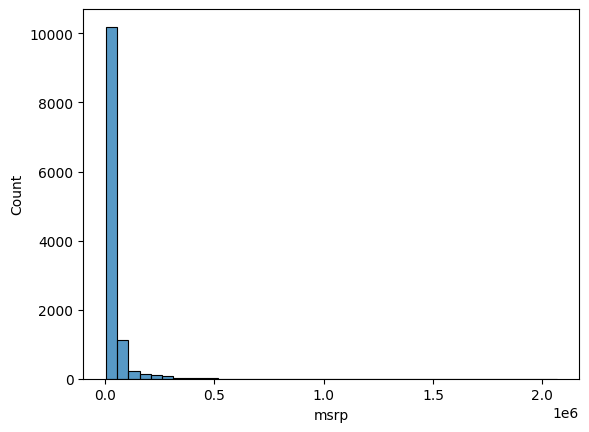

In [62]:
# plotting the histogram
sns.histplot(df.msrp , bins = 40)

<Axes: xlabel='msrp', ylabel='Count'>

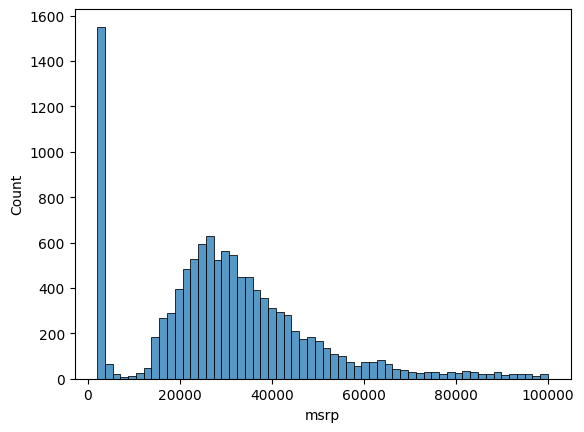

In [63]:
# small values
sns.histplot(df.msrp [df.msrp<100000])

<Axes: xlabel='msrp', ylabel='Count'>

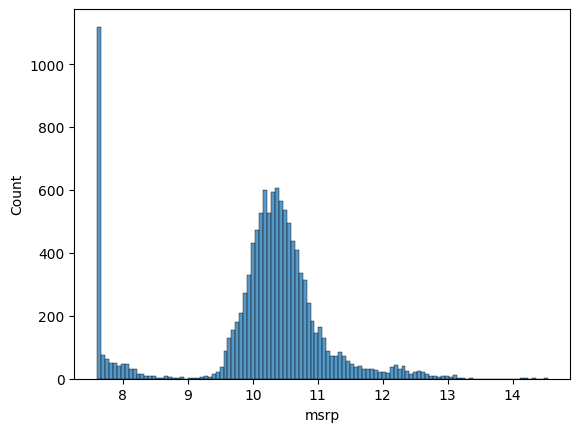

In [64]:
# apply a log transformation to the  variable for correct estimation of coefficients
log_prices = np.log1p(df.msrp)
sns.histplot(log_prices)

### Missing values

In [65]:
# checking for missing values
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

## Validation Framework

### Spliting the data into validation , test and training sets

In [66]:
n = len(df)
n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

In [67]:
np.random.seed(2)
idx = np.arange(n)
np.random.shuffle(idx)

In [ ]:
df_shuffled = df.iloc[idx]

df_train = df_shuffled.iloc[: n_train].copy()
df_test = df_shuffled.iloc[n_train : n_train + n_test].copy()
df_val = df_shuffled.iloc[n_train + n_test :].copy()


In [69]:
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

In [70]:
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

## Traing the model

### Linear regression implementation

In [71]:
def train_linear_reg(X , y):
    # adding the dummy column
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones , X])
    # normal equation formula
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0] , w[1 :]

## Predicting the price

### Baseline solution

In [72]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg',
 'popularity']
df_num = df_train[base]

In [73]:
# Filling missing values with 0
df_num = df_num.fillna(0)

In [74]:
# converting the matrix X to a numpy array
X_train = df_num.values


In [75]:
# Traing the model
w0 , w = train_linear_reg(X_train , y_train)

In [76]:
# Using the model for prediction
y_pred = w0 + X_train.dot(w)
y_pred

array([ 9.54792783,  9.38733977,  9.67197758, ..., 10.30423015,
       11.9778914 ,  9.99863111])

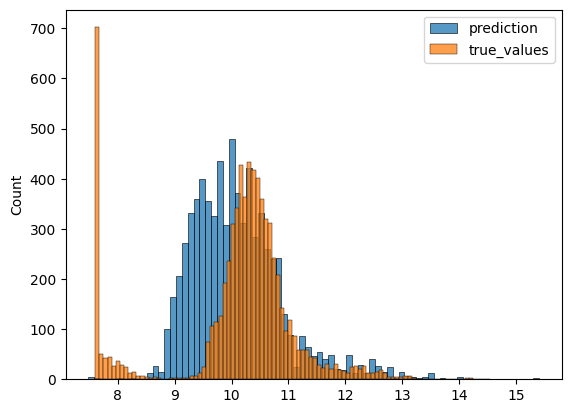

In [77]:
sns.histplot(y_pred , label = 'prediction')
sns.histplot(y_train , label = 'true_values')
plt.legend()

### Evaluating the model

#### RMSE implementation

In [78]:
def rmse(y , y_pred):
    err = y - y_pred
    mse = (err *2).mean()
    return np.sqrt(mse)

In [79]:
y_train

array([ 9.57574708,  9.887663  ,  9.89323518, ..., 10.45380308,
       12.62248099, 10.54061978])

In [80]:
rmse(y_train , y_pred)

np.float64(1.7392310146182498e-07)

## validating the model

In [81]:
# validating_test
df_num = df_val[base]
df_num = df_num.fillna(0)
X_val = df_num.values

In [82]:
# Use the model on the validating test
y_pred = w0 + X_val.dot(w)

In [83]:
# evaluate the model performance
rmse(y_val , y_pred)

np.float64(0.24133560799118572)

### The prepare_X function for converting a DataFrame into a matrix

In [84]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [85]:
# Training test
X_train = prepare_X(df_train)
w0 , w = train_linear_reg(X_train , y_train)
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
print('validation :' , rmse(y_val , y_pred))

validation : 0.24133560799118572


## Feature engineering

### Adding the age feature in the prepare_X function

In [86]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()
    df['age'] = 2017 - df['year']
    features.append('age')
    
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [87]:
X_train = prepare_X(df_train)
w_0, w = train_linear_reg(X_train, y_train)
X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred))

validation: 0.08515412893226125


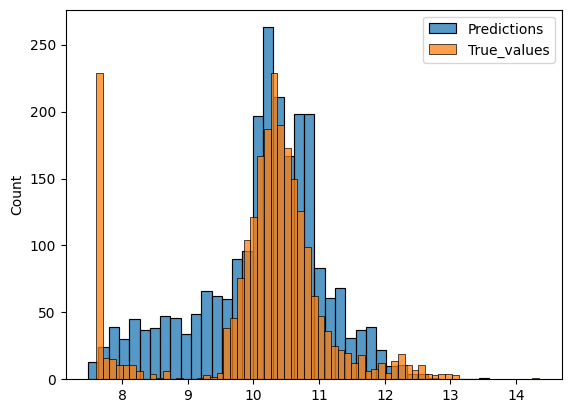

In [88]:
sns.histplot(y_pred , label = 'Predictions')
sns.histplot(y_val , label = 'True_values')
plt.legend()

## Handling categorical variable

In [89]:
df.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

In [90]:
# most_frequent
df['make'].value_counts().head(5)

make
chevrolet     1123
ford           881
volkswagen     809
toyota         746
dodge          626
Name: count, dtype: int64

### Prepare_X function(including handling missing_values)

In [115]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()
    df['age'] = 2017 - df.year
    features.append('age')
    # encode the variable number of doors
    for v in [2, 3, 4]:      
        feature = 'num_doors_%s' % v
        df[feature] = (df['number_of_doors'] == v).astype(int)
        features.append(feature)
    # encode the variable make    
    for v in ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']:    
        feature = 'is_make_%s' % v
        df[feature] = (df['make'] == v).astype(int)
        features.append(feature)
    # Encode the type varaiable
    for v in ['regular_unleaded', 'premium_unleaded_(required)','premium_unleaded_(recommended)', 'flex-fuel_(unleaded/e85)']:      
        feature = 'is_type_%s' % v
 
        df[feature] = (df['engine_fuel_type'] == v).astype(int)
        features.append(feature)
    # Encode the transmission variable
    for v in ['automatic', 'manual', 'automated_manual']:  
        feature = 'is_transmission_%s' % v
        df[feature] = (df['transmission_type'] == v).astype(int)
        features.append(feature) 
    # Encode the number of driven wheels
    for v in ['front_wheel_drive', 'rear_wheel_drive','all_wheel_drive', 'four_wheel_drive']:    
        feature = 'is_driven_wheels_%s' % v
        df[feature] = (df['driven_wheels'] == v).astype(int)
        features.append(feature) 
    # Encode the market Category
    for v in ['crossover', 'flex_fuel', 'luxury', 'luxury,performance', 'hatchback']:    
        feature = 'is_mc_%s' % v
        df[feature] = (df['market_category'] == v).astype(int)
        features.append(feature) 
    # Encode the size
    for v in ['compact', 'midsize', 'large']:    
        feature = 'is_size_%s' % v
        df[feature] = (df['vehicle_size'] == v).astype(int)
        features.append(feature)  
    # Encode The style
    for v in ['sedan', '4dr_suv', 'coupe', 'convertible','4dr_hatchback']:  
        feature = 'is_style_%s' % v

        df[feature] = (df['vehicle_style'] == v).astype(int)
        features.append(feature)
  
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values 
    return X       

In [104]:
# Check if the RMSE improove
X_train = prepare_X(df_train)
w_0, w = train_linear_reg(X_train, y_train)
X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred))

validation: 10.614481220969102


The rmse increased

In [105]:
w0 , w

(np.float64(7.927257388069986),
 array([ 4.76304363e-01, -4.01448725e+00,  1.94990669e+00, -8.17814053e-01,
         1.31225576e-02,  2.71941099e+00,  6.39222573e+01,  1.07416481e+02,
         9.62141822e+01,  3.24473534e+00, -4.57385920e+01,  5.07664505e+01,
         3.86085199e+00, -1.11432974e+01,  9.80557610e+01,  8.22831396e+01,
         9.88784683e+01,  7.29870302e+01, -2.63244126e+02, -2.76460605e+02,
        -3.86621622e+02, -1.58389989e+16, -1.58389989e+16, -1.58389989e+16,
        -1.58389989e+16, -4.51393444e+00,  2.92070047e+01,  1.63109175e+01,
        -3.17230729e+00,  3.91956562e-01,  1.11313743e+02,  8.23006156e+01,
         6.63920488e+01, -7.67460186e-02,  4.14645821e-02,  1.86187511e-01,
         3.55798979e-01, -2.14066472e-01]))

The weights are large

## Regularisation

### linear regression with regularisation

In [106]:
def train_linear_regression_with_reg(X , y , r = 0.01):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones , X])
    
    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    return w[0] , w[1 :]
    

In [107]:
for r in [0, 0.001, 0.01, 0.1, 1, 10]:
    w_0, w = train_linear_regression_with_reg(X_train, y_train, r=r)
    print('%5s, %.2f, %.2f, %.2f' % (r, w_0, w[13], w[21]))

    0, 15838998853873358.00, -11.14, -15838998853873556.00
0.001, 7.20, -0.10, 1.81
 0.01, 7.18, -0.10, 1.81
  0.1, 7.05, -0.10, 1.78
    1, 6.22, -0.10, 1.56
   10, 4.39, -0.09, 1.08


The aim goal of regularisation is to force the matrix to be inversible

In [109]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression_with_reg(X_train, y_train, r=0.001)
X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred))

validation: 0.1250112257757631


In [111]:
X_train = prepare_X(df_train)
X_val = prepare_X(df_val)
for r in [0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w_0, w = train_linear_regression_with_reg(X_train, y_train, r=r)
    y_pred = w_0 + X_val.dot(w)
    print('%6s' %r, rmse(y_val, y_pred))


 1e-06 0.1249853053709494
0.0001 0.12501546447790302
 0.001 0.1250112257757631
  0.01 0.12496999874119763
   0.1 0.12461269625518234
     1 0.1243500862579478
     5 0.13799563213838936
    10 0.15585179044379321


In [116]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression_with_reg(X_train, y_train, r=1)
X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred))
X_test = prepare_X(df_test)
y_pred = w_0 + X_test.dot(w)
print('test:', rmse(y_test, y_pred))

validation: 0.1243500862579478
test: 0.09200187534210622


## Using The model

In [117]:
ad = {
    'city_mpg': 18,
 

 
    'driven_wheels': 'all_wheel_drive',
    'engine_cylinders': 6.0,
    'engine_fuel_type': 'regular_unleaded',
    'engine_hp': 268.0,
    'highway_mpg': 25,
    'make': 'toyota',
    'market_category': 'crossover,performance',
    'model': 'venza',
    'number_of_doors': 4.0,
    'popularity': 2031,
    'transmission_type': 'automatic',
    'vehicle_size': 'midsize',
    'vehicle_style': 'wagon',
    'year': 2013
}

In [118]:
df_test = pd.DataFrame([ad])
X_test = prepare_X(df_test)

In [119]:
y_pred = w_0 + X_test.dot(w)

In [120]:
suggestion = np.expm1(y_pred)
suggestion

array([28242.6870684])

## Using different types of imputation

In [6]:
df.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [126]:
miss_cols = ['engine_fuel_type' ,'engine_hp' , 'engine_cylinders' , 'market_category' ]


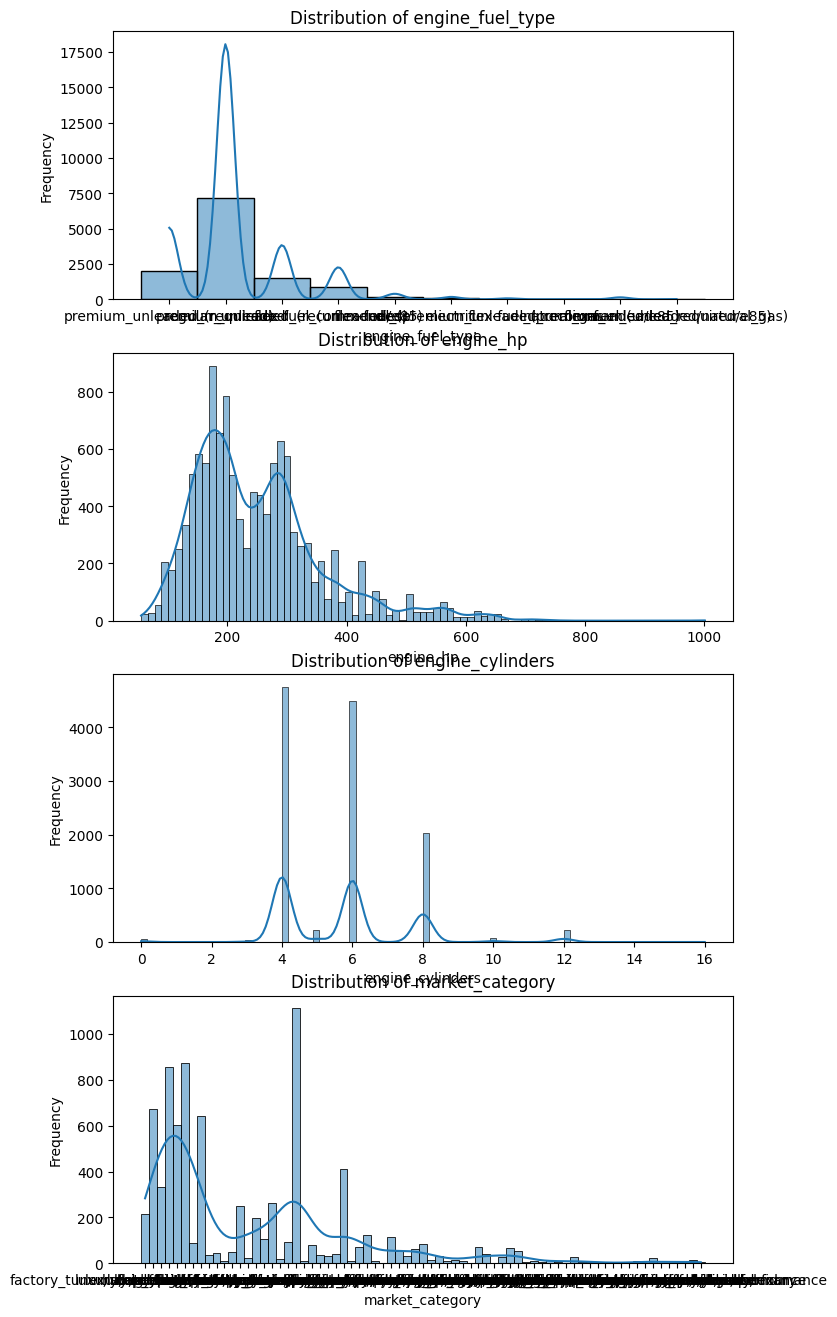

In [134]:
fig , axes = plt.subplots(len(miss_cols) , 1,figsize = (8 , 4*len(miss_cols)))
for ax , col in zip(axes , miss_cols):
    sns.histplot(df[col] , kde = True , ax = ax)
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

We will fill missing values as follow:
- engine fuel type : most frequent
- engine hp : Median
- engine cylinder :  weighted imputation
- market category : Mode

In [12]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'most_frequent')


In [ ]:
# Imputing the engine_fuel_type column
df['engine_fuel_type'] = imputer.fit_transform(df[['engine_fuel_type']]).ravel()

<Axes: xlabel='engine_fuel_type', ylabel='Count'>

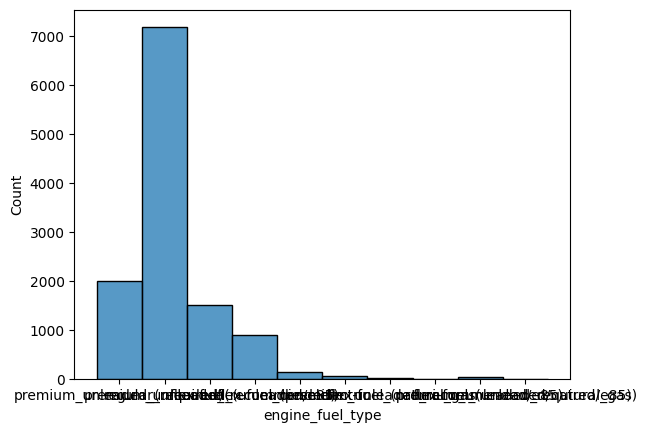

In [17]:
sns.histplot(df['engine_fuel_type'] )

In [18]:
# Imputing the engine_hp
imputer = SimpleImputer(strategy= 'median')


In [19]:
df['engine_hp'] = imputer.fit_transform(df[['engine_hp']]).ravel()

<Axes: xlabel='engine_hp', ylabel='Count'>

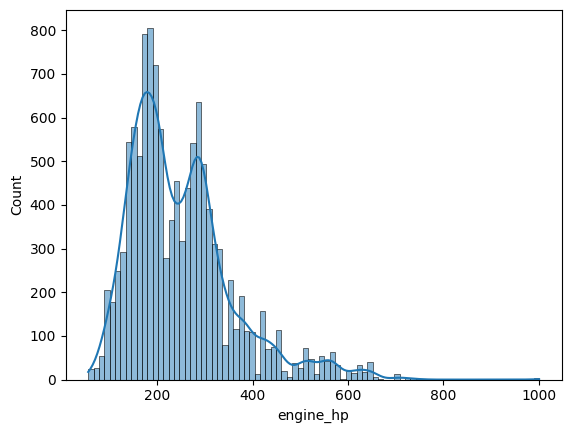

In [21]:
sns.histplot(df['engine_hp'] , kde=True)

In [22]:
# Imputing the engine cylindre
imputer = SimpleImputer(strategy='most_frequent')


In [23]:
df['engine_cylinders'] = imputer.fit_transform(df[['engine_cylinders']]).ravel()

<Axes: xlabel='engine_cylinders', ylabel='Count'>

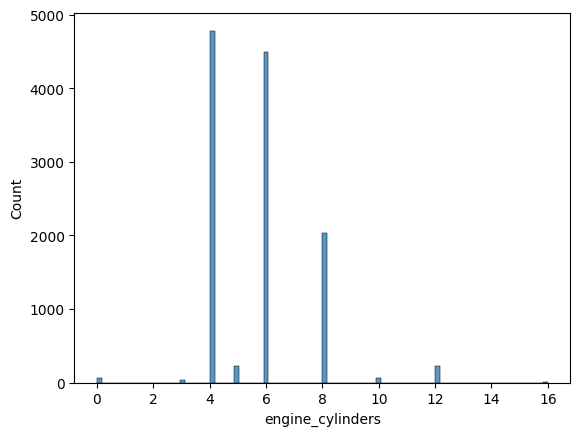

In [24]:
sns.histplot(df['engine_cylinders'])